In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np
from scipy.stats import norm
import random
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import lightgbm as lgbm
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df = pd.read_csv('LatencyTraining.csv')

In [4]:
df

,Unnamed: 0,LogReturns
0,0,-0.002192
1,1,0.009342
2,2,0.012838
3,3,0.003451
4,4,0.004386
...,...,...
1821,1821,-0.000256
1822,1822,0.005807
1823,1823,-0.024478
1824,1824,-0.021754


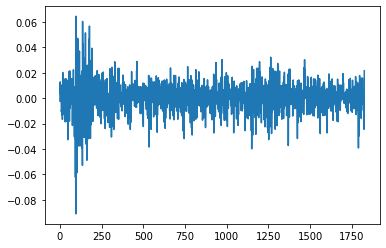

In [5]:
plt.plot(df.LogReturns)

## MODELS

In [6]:
windowsize=500 # windowsize input 
K=100 # K parameter for KNN algorithm  

# load training data
data = list(df['LogReturns'])

# convert time series into training examples
x = []
y = []
for i in range(len(data)-windowsize):
    x.append(data[i:i+windowsize])
    if data[i + windowsize] > data[i + windowsize - 1]:
        y.append(1)
    else:
        y.append(0)
    
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

# declare and train classifier
classifier=KNeighborsClassifier(n_neighbors=K)
classifier.fit(x_train, y_train)

# classify terminal input
# for line in stdin:
#     if line == '': 
#         break
#     d=[float(x) for x in line.split(',')]
#     print(classifier.predict([d])[0])

KNeighborsClassifier(n_neighbors=100)

In [7]:
print(classifier.score(x_train, y_train))
print(classifier.score(x_test, y_test))

0.6018867924528302
0.5488721804511278


## LGBM classifier

In [11]:
train_set = lgbm.Dataset(x_train, label = y_train)
valid_set = lgbm.Dataset(x_test, label = y_test)
param = {'num_leaves': 30, 'max_depth': 5, 'min_data_in_leaf':10, 'objective': 'binary', 'metric': 'auc', 'verbose': 0}
num_round = 30
lgbm_model = lgbm.train(param, train_set, num_round, valid_sets=[valid_set])
                         
                         

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021877 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's auc: 0.742885
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's auc: 0.730726
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's auc: 0.758872
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's auc: 0.7661
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's auc: 0.78288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6]	valid_0's auc: 0.782115
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[7]	valid_0's auc: 0.789626
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[8]	valid_0's auc: 0.798101
[LightGBM] [Wa

In [12]:
lgbm_model.predict(x_test)


array([0.37955714, 0.58858223, 0.71676782, 0.81850721, 0.21951603,
       0.71636229, 0.52006757, 0.26886469, 0.22682321, 0.08427046,
       0.72136063, 0.8285458 , 0.67550211, 0.84804526, 0.09944497,
       0.60749309, 0.51732387, 0.1337255 , 0.92830082, 0.7539373 ,
       0.70136192, 0.09140805, 0.70804132, 0.23012369, 0.11665965,
       0.88852341, 0.05123521, 0.06455599, 0.15880207, 0.73266816,
       0.86440464, 0.30788042, 0.8284175 , 0.88609015, 0.55333134,
       0.04866934, 0.76427835, 0.60984293, 0.11489764, 0.89686292,
       0.88805995, 0.07243419, 0.48522943, 0.93918206, 0.19277097,
       0.21253239, 0.11713952, 0.32726091, 0.47771799, 0.63728962,
       0.72155783, 0.65238814, 0.83958901, 0.54191754, 0.10594608,
       0.29263708, 0.70881289, 0.69081308, 0.66016352, 0.05640822,
       0.32863382, 0.61728182, 0.31159886, 0.80783846, 0.70254195,
       0.75924975, 0.05466468, 0.84547799, 0.87671575, 0.44090414,
       0.30084663, 0.69000577, 0.86810398, 0.03707085, 0.82737

In [ ]:
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# import datetime
# import numpy as np
# from scipy.stats import norm
# import random
# from sklearn import preprocessing
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn import svm
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix, classification_report
# import lightgbm as lgbm
# from sklearn.neighbors import KNeighborsClassifier

# data = list(pd.read_csv('LatencyTraining.csv')['LogReturns'])

# # convert time series into training examples
# windowsize=500
# x = []
# y = []
# for i in range(len(data)-windowsize):
#     x.append(data[i:i+windowsize])
#     if data[i + windowsize] > data[i + windowsize - 1]:
#         y.append(1)
#     else:
#         y.append(0)

# # train model
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

# train_set = lgbm.Dataset(x_train, label = y_train)
# valid_set = lgbm.Dataset(x_test, label = y_test)
# param = {'num_leaves': 30, 'max_depth': 5, 'min_data_in_leaf':10, 'objective': 'binary', 'metric': 'auc', 'verbose': 0}
# num_round = 30
# lgbm_model = lgbm.LGBMClassifier()
# lgbm_model.fit(x_train, y_train)
# lgbm_model.score(x_test, y_test)